In [ ]:
import pandas as pd
ML_Data=pd.read_csv('/content/Caped_ML_Dataset.csv')
ML_Data.head()

,City,Body_type,Fuel_type,Transmission_Type,Manufactured_By,kilometers_Driven,Previous_owners,Seats,Mileage,Engine,Car Age,Price
0,Bangalore,Hatchback,Petrol,Manual,Maruti,120000,3,5,23.10,998.0,9,400000
1,Bangalore,SUV,Petrol,Manual,Ford,32706,2,5,17.00,1497.0,6,811000
2,Bangalore,Hatchback,Petrol,Manual,Tata,11949,1,5,23.84,1199.0,6,585000
3,Bangalore,Sedan,Petrol,Manual,Hyundai,17794,1,5,19.10,1197.0,10,462000
4,Bangalore,SUV,Diesel,Manual,Maruti,60000,1,5,23.65,1248.0,9,790000


In [ ]:
ML_Data.head()

,City,Body_type,Fuel_type,Transmission_Type,Manufactured_By,kilometers_Driven,Previous_owners,Seats,Mileage,Engine,Car Age,Price
0,Bangalore,Hatchback,Petrol,Manual,Maruti,120000,3,5,23.10,998.0,9,400000
1,Bangalore,SUV,Petrol,Manual,Ford,32706,2,5,17.00,1497.0,6,811000
2,Bangalore,Hatchback,Petrol,Manual,Tata,11949,1,5,23.84,1199.0,6,585000
3,Bangalore,Sedan,Petrol,Manual,Hyundai,17794,1,5,19.10,1197.0,10,462000
4,Bangalore,SUV,Diesel,Manual,Maruti,60000,1,5,23.65,1248.0,9,790000


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import pickle

# Sample data loading (replace with your actual data loading)
# ML_Data = pd.read_csv('path_to_your_data.csv')

# Define categorical columns
frequency_encoding_columns = ['Body_type', 'Manufactured_By','City', 'Fuel_type', 'Transmission_Type']
# Frequency Encoding for Body_type and Manufactured_By
category_mappings = {}
for column in frequency_encoding_columns:
    frequency_map = ML_Data[column].value_counts(normalize=True)  # Get frequency distribution
    ML_Data[column + '_freq'] = ML_Data[column].map(frequency_map)  # Map frequencies to a new column
    # Store frequency mappings
    category_mappings[column] = frequency_map.to_dict()

# Drop original categorical columns if needed
ML_Data.drop(columns=frequency_encoding_columns, inplace=True)

# Save the encoded DataFrame and category mappings to a pickle file
with open(r'Fre_en.pkl', 'wb') as f:
    pickle.dump((category_mappings), f)

print("Data and mappings saved to pickle file successfully!")


Data and mappings saved to pickle file successfully!


In [ ]:
ML_Data.shape

(8281, 12)

In [ ]:
ML_Data.head()

,kilometers_Driven,Previous_owners,Seats,Mileage,Engine,Car Age,Price,Body_type_freq,Manufactured_By_freq,City_freq,Fuel_type_freq,Transmission_Type_freq
0,120000,3,5,23.10,998.0,9,400000,0.429779,0.271103,0.176911,0.666707,0.727569
1,32706,2,5,17.00,1497.0,6,811000,0.262166,0.037314,0.176911,0.666707,0.727569
2,11949,1,5,23.84,1199.0,6,585000,0.429779,0.049994,0.176911,0.666707,0.727569
3,17794,1,5,19.10,1197.0,10,462000,0.260234,0.199010,0.176911,0.666707,0.727569
4,60000,1,5,23.65,1248.0,9,790000,0.262166,0.271103,0.176911,0.319768,0.727569


In [ ]:
!pip install tensorflow keras

**Importing the model needed for train the Deep Learing Model**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers

**Splitting the Data into the Features and the Targets**

In [ ]:
X = ML_Data.drop('Price', axis=1)
y = ML_Data['Price']

Splitting the Data for the Training and the Testing data

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Scaling feature using the Standard Scaler**

In [ ]:
# Scale numerical features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Defining the r2_metrics**

In [ ]:
def r2_metric(y_true, y_pred):
    from tensorflow.keras import backend as K
    # Cast y_true to the same type as y_pred
    y_true = tf.cast(y_true, dtype=tf.float32)
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res / (SS_tot + K.epsilon()))

**Defining the model Layers**

In [ ]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],),
                 kernel_regularizer=regularizers.l2(0.001)),  # L2 Regularization
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1)  # Output layer for regression
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compiling the Model**

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', r2_metric])

**Training the Model**

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=170, batch_size=64, validation_split=0.2)

Epoch 1/170
73/73 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 1901582221312.0000 - mae: 918367.6875 - r2_metric: -0.9166 - val_loss: 1692173598720.0000 - val_mae: 853821.1250 - val_r2_metric: -0.8113
Epoch 2/170
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1161762045952.0000 - mae: 652650.3750 - r2_metric: -0.2421 - val_loss: 378230767616.0000 - val_mae: 349138.2500 - val_r2_metric: 0.5948
Epoch 3/170
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 372520550400.0000 - mae: 348023.6875 - r2_metric: 0.6657 - val_loss: 337143463936.0000 - val_mae: 332050.0312 - val_r2_metric: 0.6356
Epoch 4/170
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 315579629568.0000 - mae: 317982.4062 - r2_metric: 0.6793 - val_loss: 312158322688.0000 - val_mae: 297288.5938 - val_r2_metric: 0.6756
Epoch 5/170
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 306829328384.0000 - mae: 310962.8125 - r2_metric: 0.6816 - val_loss: 303892463616.0000 - val_mae: 308639.9062 - val_r2_metric: 0.6687
Epoch 6/170
73/73 ━━━━━━━━━━

**Evaluating the Model**

In [ ]:
loss, mae, r2 = model.evaluate(X_test, y_test)
print('Mean Squared Error:', loss)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 160215810048.0000 - mae: 173409.9844 - r2_metric: 0.8056
Mean Squared Error: 177233379328.0
Mean Absolute Error: 190261.03125
R2 Score: 0.8253037929534912


**Making the Prediction and r2 Score calculating**

In [ ]:
# Calculate R2 score using sklearn
y_pred = model.predict(X_test)
r2_sklearn = r2_score(y_test, y_pred)
print('R2 Score (Sklearn):', r2_sklearn)

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
R2 Score (Sklearn): 0.8475072979927063


**Visualizing the Convergence**

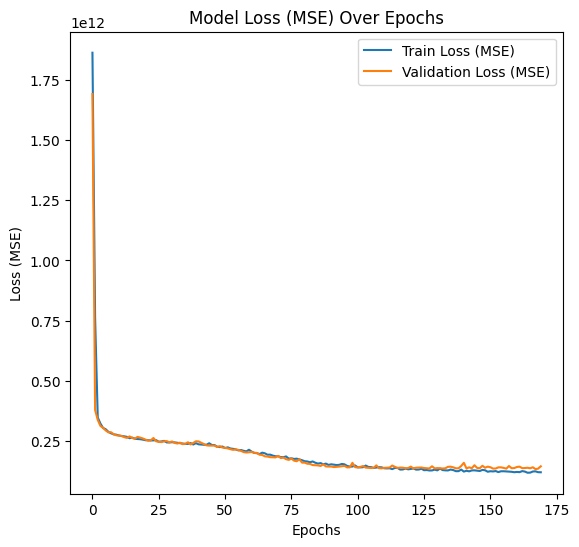

In [ ]:
plt.figure(figsize=(14, 6))

# Plot training and validation loss (MSE)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Model Loss (MSE) Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

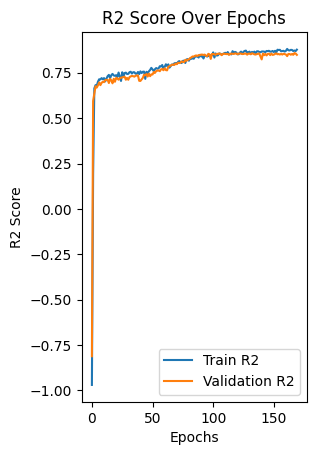

In [ ]:
# Plot training and validation R2 metric
plt.subplot(1, 2, 2)
plt.plot(history.history['r2_metric'], label='Train R2')
plt.plot(history.history['val_r2_metric'], label='Validation R2')
plt.title('R2 Score Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('R2 Score')
plt.legend()

plt.show()

# Conclusion:

>  At First Epoch Itself It reached around 0.74 R2 Score after That the R2 score is not Increased no Matter How many Layer I have Increased I have Trained With as small as 1 hidden Layer or As large as 6 hidden Layer Model Not Converged

> Reason: The Dataset is too small, If we are using DNN means the dataset Complexity and need to have a large amount of the dataset but it have only 8500 record which is sufficient for ML but not for DNN




